In [178]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

### Парсинг данных

Парсинг осуществлялся с сайта sports.ru. Бралась статистика футбольных матчей английской премьер лиги за последние 3 сезона. 

In [215]:
def single_match_stats(stat):
    a = []
    for elem in stat:
        a.append(elem.text)
    return np.array(a)

def open_stats(links):
    b = np.empty((0,18), int)
    for elem in links:
        link = elem.get('href')
        url = link
        result = elem.text
        response = requests.get(url)
        tree = BeautifulSoup(response.content, 'html.parser')
        stat = tree.find_all('span', {'class': 'statistics-info-bar__stat'})
        name = tree.find('h1', {'class': 'top__title'}).text
        b = np.vstack([b, np.concatenate((single_match_stats(stat), np.array([result, name])))])
    return b

c = np.empty((0,18), int)

for i in ['8', '9', '10', '11', '12', '1', '2', '3', '4', '5']:
    url = f'https://www.sports.ru/epl/calendar/?s=8672&m=' + i
    resp_links = requests.get(url)
    tree_links = BeautifulSoup(resp_links.content, 'html.parser')
    links = tree_links.find_all('a', {'class': 'score'})
    c = np.vstack([c, open_stats(links)])
    
print(c)

[['36%' '64%' '8' ... '1' '2 : 0'
  'Брентфорд - Арсенал: обзор матча 13 августа 2021 , 19:00']
 ['49%' '51%' '13' ... '3' '5 : 1'
  'Манчестер Юнайтед - Лидс: обзор матча 14 августа 2021 , 11:30']
 ['36%' '64%' '11' ... '0' '1 : 2'
  'Бернли - Брайтон: обзор матча 14 августа 2021 , 14:00']
 ...
 ['73%' '27%' '17' ... '0' '5 : 1'
  'Арсенал - Эвертон: обзор матча 22 мая 2022 , 15:00']
 ['49%' '51%' '12' ... '2' '1 : 2'
  'Брентфорд - Лидс: обзор матча 22 мая 2022 , 15:00']
 ['71%' '29%' '14' ... '2' '2 : 1' 'Челси - Уотфорд: обзор матча ']]


In [216]:
def single_match_stats(stat):
    a = []
    for elem in stat:
        a.append(elem.text)
    return np.array(a)

def open_stats(links):
    b = np.empty((0,18), int)
    for elem in links:
        link = elem.get('href')
        url = link
        result = elem.text
        response = requests.get(url)
        tree = BeautifulSoup(response.content, 'html.parser')
        stat = tree.find_all('span', {'class': 'statistics-info-bar__stat'})
        name = tree.find('h1', {'class': 'top__title'}).text
        b = np.vstack([b, np.concatenate((single_match_stats(stat), np.array([result, name])))])
    return b

d = np.empty((0,18), int)

for i in ['8', '9', '10', '11', '12', '1', '2', '3', '4', '5']:
    url = f'https://www.sports.ru/epl/calendar/?s=8127&m=' + i
    resp_links = requests.get(url)
    tree_links = BeautifulSoup(resp_links.content, 'html.parser')
    links = tree_links.find_all('a', {'class': 'score'})
    d = np.vstack([d, open_stats(links)])
    
print(d)

[['46%' '54%' '4' ... '2' '0 : 3'
  'Фулхэм - Арсенал: обзор матча 12 сентября 2020 , 11:30']
 ['30%' '70%' '5' ... '0' '1 : 0'
  'Кристал Пэлас - Саутгемптон: обзор матча 12 сентября 2020 , 14:00']
 ['49%' '51%' '9' ... '5' '4 : 3'
  'Ливерпуль - Лидс: обзор матча 12 сентября 2020 , 16:30']
 ...
 ['43%' '57%' '10' ... '1' '1 : 0'
  'Шеффилд Юнайтед - Бернли: обзор матча 23 мая 2021 , 15:00']
 ['37%' '63%' '13' ... '2' '3 : 0'
  'Вест Хэм - Саутгемптон: обзор матча 23 мая 2021 , 15:00']
 ['57%' '43%' '10' ... '1' '1 : 2'
  'Вулверхэмптон - Манчестер Юнайтед: обзор матча 23 мая 2021 , 15:00']]


In [217]:
def single_match_stats(stat):
    a = []
    for elem in stat:
        a.append(elem.text)
    return np.array(a)

def open_stats(links):
    b = np.empty((0,18), int)
    for elem in links:
        link = elem.get('href')
        url = link
        result = elem.text
        response = requests.get(url)
        tree = BeautifulSoup(response.content, 'html.parser')
        stat = tree.find_all('span', {'class': 'statistics-info-bar__stat'})
        name = tree.find('h1', {'class': 'top__title'}).text
        b = np.vstack([b, np.concatenate((single_match_stats(stat), np.array([result, name])))])
    return b

e = np.empty((0,18), int)

for i in ['8', '9', '10', '11', '12', '1', '2', '3', '4', '5']:
    url = f'https://www.sports.ru/epl/calendar/?s=7380&m=' + i
    resp_links = requests.get(url)
    tree_links = BeautifulSoup(resp_links.content, 'html.parser')
    links = tree_links.find_all('a', {'class': 'score'})
    e = np.vstack([e, open_stats(links)])
    
print(e)

[['57%' '43%' '12' ... '5' '4 : 1'
  'Ливерпуль - Норвич: обзор матча 9 августа 2019 , 19:00']
 ['43%' '57%' '5' ... '4' '0 : 5'
  'Вест Хэм - Манчестер Сити: обзор матча 10 августа 2019 , 11:30']
 ['52%' '48%' '10' ... '1' '1 : 1'
  'Борнмут - Шеффилд Юнайтед: обзор матча 10 августа 2019 , 14:00']
 ...
 ['60%' '40%' '16' ... '1' '4 : 0'
  'Челси - Эвертон: обзор матча 8 марта 2020 , 14:00']
 ['28%' '72%' '8' ... '2' '2 : 0'
  'Манчестер Юнайтед - Манчестер Сити: обзор матча 8 марта 2020 , 16:30']
 ['64%' '36%' '14' ... '2' '4 : 0'
  'Лестер - Астон Вилла: обзор матча 9 марта 2020 , 20:00']]


In [224]:
final = np.concatenate((c, e, d), axis = 0)

In [225]:
data = pd.DataFrame(final)

In [227]:
data.columns = ['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2','Удары в створ1', 'Удары в створ2',
                           'Удары мимо1', 'Удары мимо2','Фолы1', 'Фолы2',
                           'Угловые удары1', 'Угловые удары2', 'Штрафные удары1', 'Штрафные удары2', 'Вне игры1', 'Вне игры2', 'Результат', 'Команды']

In [234]:
team1 = []
team2 = []
for elem in data['Команды'].values:
    team1.append(elem[:elem.find('-')])
    team2.append(elem[elem.find('-') + 1 : elem.find(':')])
data['Команда1'] = team1
data['Команда2'] = team2
data = data.drop('Команды', axis = 1)

spisok1 = []
for elem in data['Результат'].values:
    spisok1.append(elem[0])
spisok2 = []
for elem in data['Результат'].values:
    spisok2.append(elem[4])
data['Голы1'] = spisok1
data['Голы2'] = spisok2
data = data.drop('Результат', axis = 1
                 
spisok3 = []
spisok4 = []
for elem in data['Владение1'].values:
    spisok3.append(elem[:2])
for elem in data['Владение2'].values:
    spisok4.append(elem[:2])
data['Владение1'] = spisok3
data['Владение2'] = spisok4
                 
data[['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2','Удары в створ1', 'Удары в створ2',
                           'Удары мимо1', 'Удары мимо2','Фолы1', 'Фолы2',
                           'Угловые удары1', 'Угловые удары2', 'Штрафные удары1', 'Штрафные удары2',
      'Вне игры1', 'Вне игры2', 'Голы1', 'Голы2']] = data[['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2',
                                                           'Удары в створ1', 'Удары в створ2',
                           'Удары мимо1', 'Удары мимо2','Фолы1', 'Фолы2',
                           'Угловые удары1', 'Угловые удары2', 'Штрафные удары1',
      'Штрафные удары2', 'Вне игры1', 'Вне игры2', 'Голы1', 'Голы2']].astype(int)
                 
spisok = []
for i in range(len(data['Голы1'])):
    if data['Голы1'].values[i] > data['Голы2'].values[i]:
        spisok.append(1)
    elif data['Голы1'].values[i] < data['Голы2'].values[i]:
        spisok.append(2)
    else:
        spisok.append(0)
data['Результат'] = spisok
data.head()

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Владение1          1048 non-null   int64 
 1   Владение2          1048 non-null   int64 
 2   Удары по воротам1  1048 non-null   int64 
 3   Удары по воротам2  1048 non-null   int64 
 4   Удары в створ1     1048 non-null   int64 
 5   Удары в створ2     1048 non-null   int64 
 6   Удары мимо1        1048 non-null   int64 
 7   Удары мимо2        1048 non-null   int64 
 8   Фолы1              1048 non-null   int64 
 9   Фолы2              1048 non-null   int64 
 10  Угловые удары1     1048 non-null   int64 
 11  Угловые удары2     1048 non-null   int64 
 12  Штрафные удары1    1048 non-null   int64 
 13  Штрафные удары2    1048 non-null   int64 
 14  Вне игры1          1048 non-null   int64 
 15  Вне игры2          1048 non-null   int64 
 16  Команда1           1048 non-null   object


In [318]:
data.isnull().sum()

Владение1            0
Владение2            0
Удары по воротам1    0
Удары по воротам2    0
Удары в створ1       0
Удары в створ2       0
Удары мимо1          0
Удары мимо2          0
Фолы1                0
Фолы2                0
Угловые удары1       0
Угловые удары2       0
Штрафные удары1      0
Штрафные удары2      0
Вне игры1            0
Вне игры2            0
Команда1             0
Команда2             0
Голы1                0
Голы2                0
Результат            0
dtype: int64

In [319]:
data.describe()

,Владение1,Владение2,Удары по воротам1,Удары по воротам2,Удары в створ1,Удары в створ2,Удары мимо1,Удары мимо2,Фолы1,Фолы2,Угловые удары1,Угловые удары2,Штрафные удары1,Штрафные удары2,Вне игры1,Вне игры2,Голы1,Голы2,Результат
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,50.980916,49.019084,9.759542,8.348282,4.640267,4.113550,5.119275,4.234733,10.535305,10.523855,5.688931,4.794847,10.044847,10.105916,1.727099,1.682252,1.453244,1.293893,1.120229
std,12.426349,12.426349,4.033457,3.842143,2.565918,2.454065,2.641975,2.429179,3.523247,3.631472,3.101066,2.740773,3.608979,3.456821,1.479549,1.481239,1.289776,1.244465,0.755022
min,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,39.000000,7.000000,5.000000,3.000000,2.000000,3.000000,2.000000,8.000000,8.000000,3.000000,3.000000,7.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,50.000000,50.000000,9.000000,8.000000,4.000000,4.000000,5.000000,4.000000,10.500000,10.000000,5.000000,4.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,61.000000,58.000000,12.000000,11.000000,6.000000,6.000000,7.000000,6.000000,13.000000,13.000000,7.000000,6.000000,12.000000,12.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,82.000000,82.000000,25.000000,22.000000,15.000000,15.000000,18.000000,14.000000,23.000000,25.000000,17.000000,16.000000,25.000000,23.000000,9.000000,10.000000,9.000000,9.000000,2.000000


### Визуализация

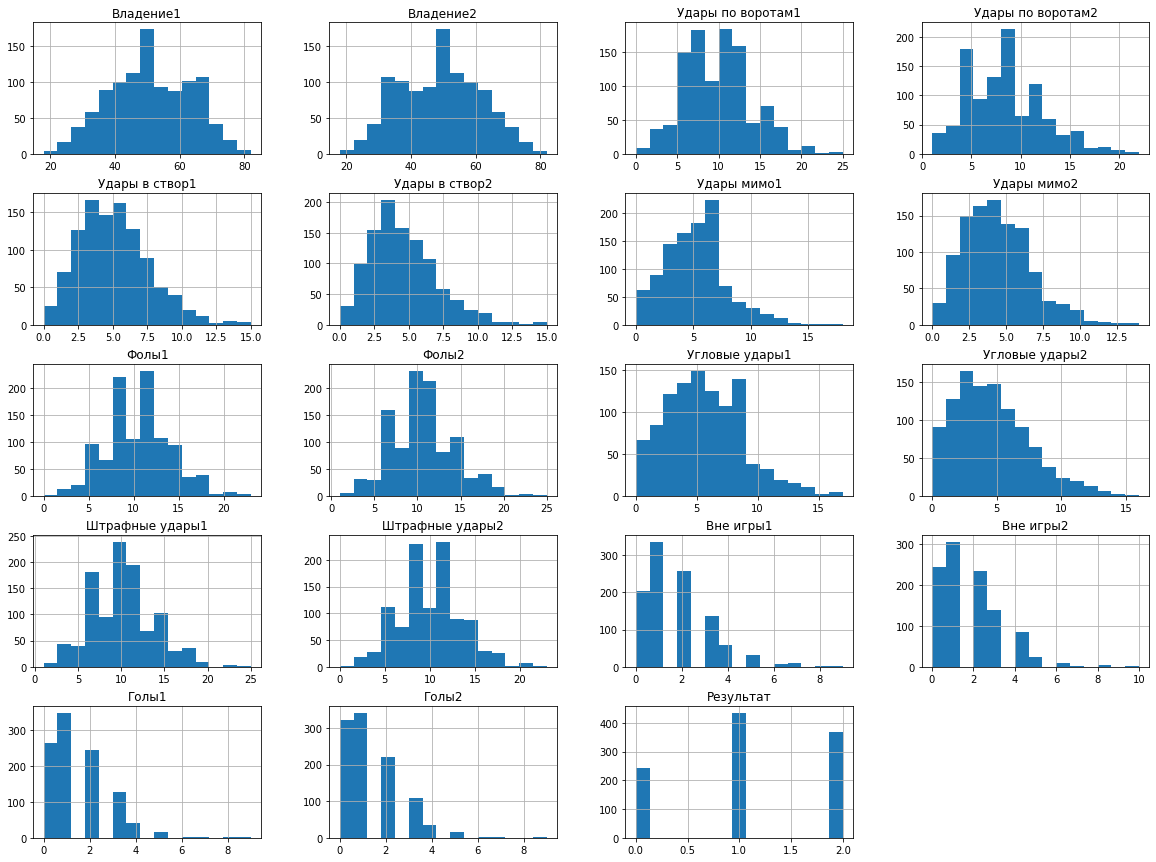

In [338]:
columns = ['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2',
       'Удары в створ1', 'Удары в створ2', 'Удары мимо1', 'Удары мимо2',
       'Фолы1', 'Фолы2', 'Угловые удары1', 'Угловые удары2',
       'Штрафные удары1', 'Штрафные удары2', 'Вне игры1', 'Вне игры2', 'Голы1', 'Голы2', 'Результат']
data[columns].hist(figsize=(20, 15), bins = 15);

Вывод: большое количество рассматриваемых показателей матчей имеет нормальное или близкое к нормальному распределение, что открывает возможности к использованию многих тестов при последующей проверке гипотез гипотез. 

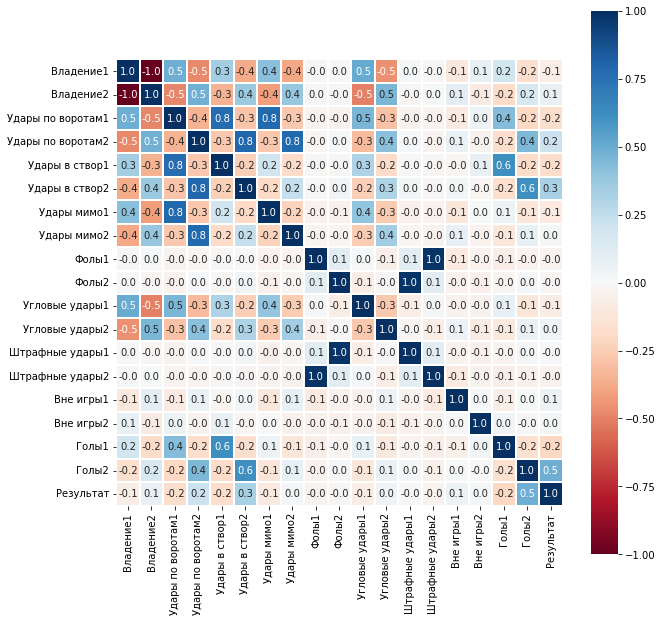

In [339]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

Вывод: можно сказать, что между большинством показателей команд наблюдается слабая или отсутствующая корреляция. 

In [344]:
data.columns.values

array(['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2',
       'Удары в створ1', 'Удары в створ2', 'Удары мимо1', 'Удары мимо2',
       'Фолы1', 'Фолы2', 'Угловые удары1', 'Угловые удары2',
       'Штрафные удары1', 'Штрафные удары2', 'Вне игры1', 'Вне игры2',
       'Команда1', 'Команда2', 'Голы1', 'Голы2', 'Результат'],
      dtype=object)

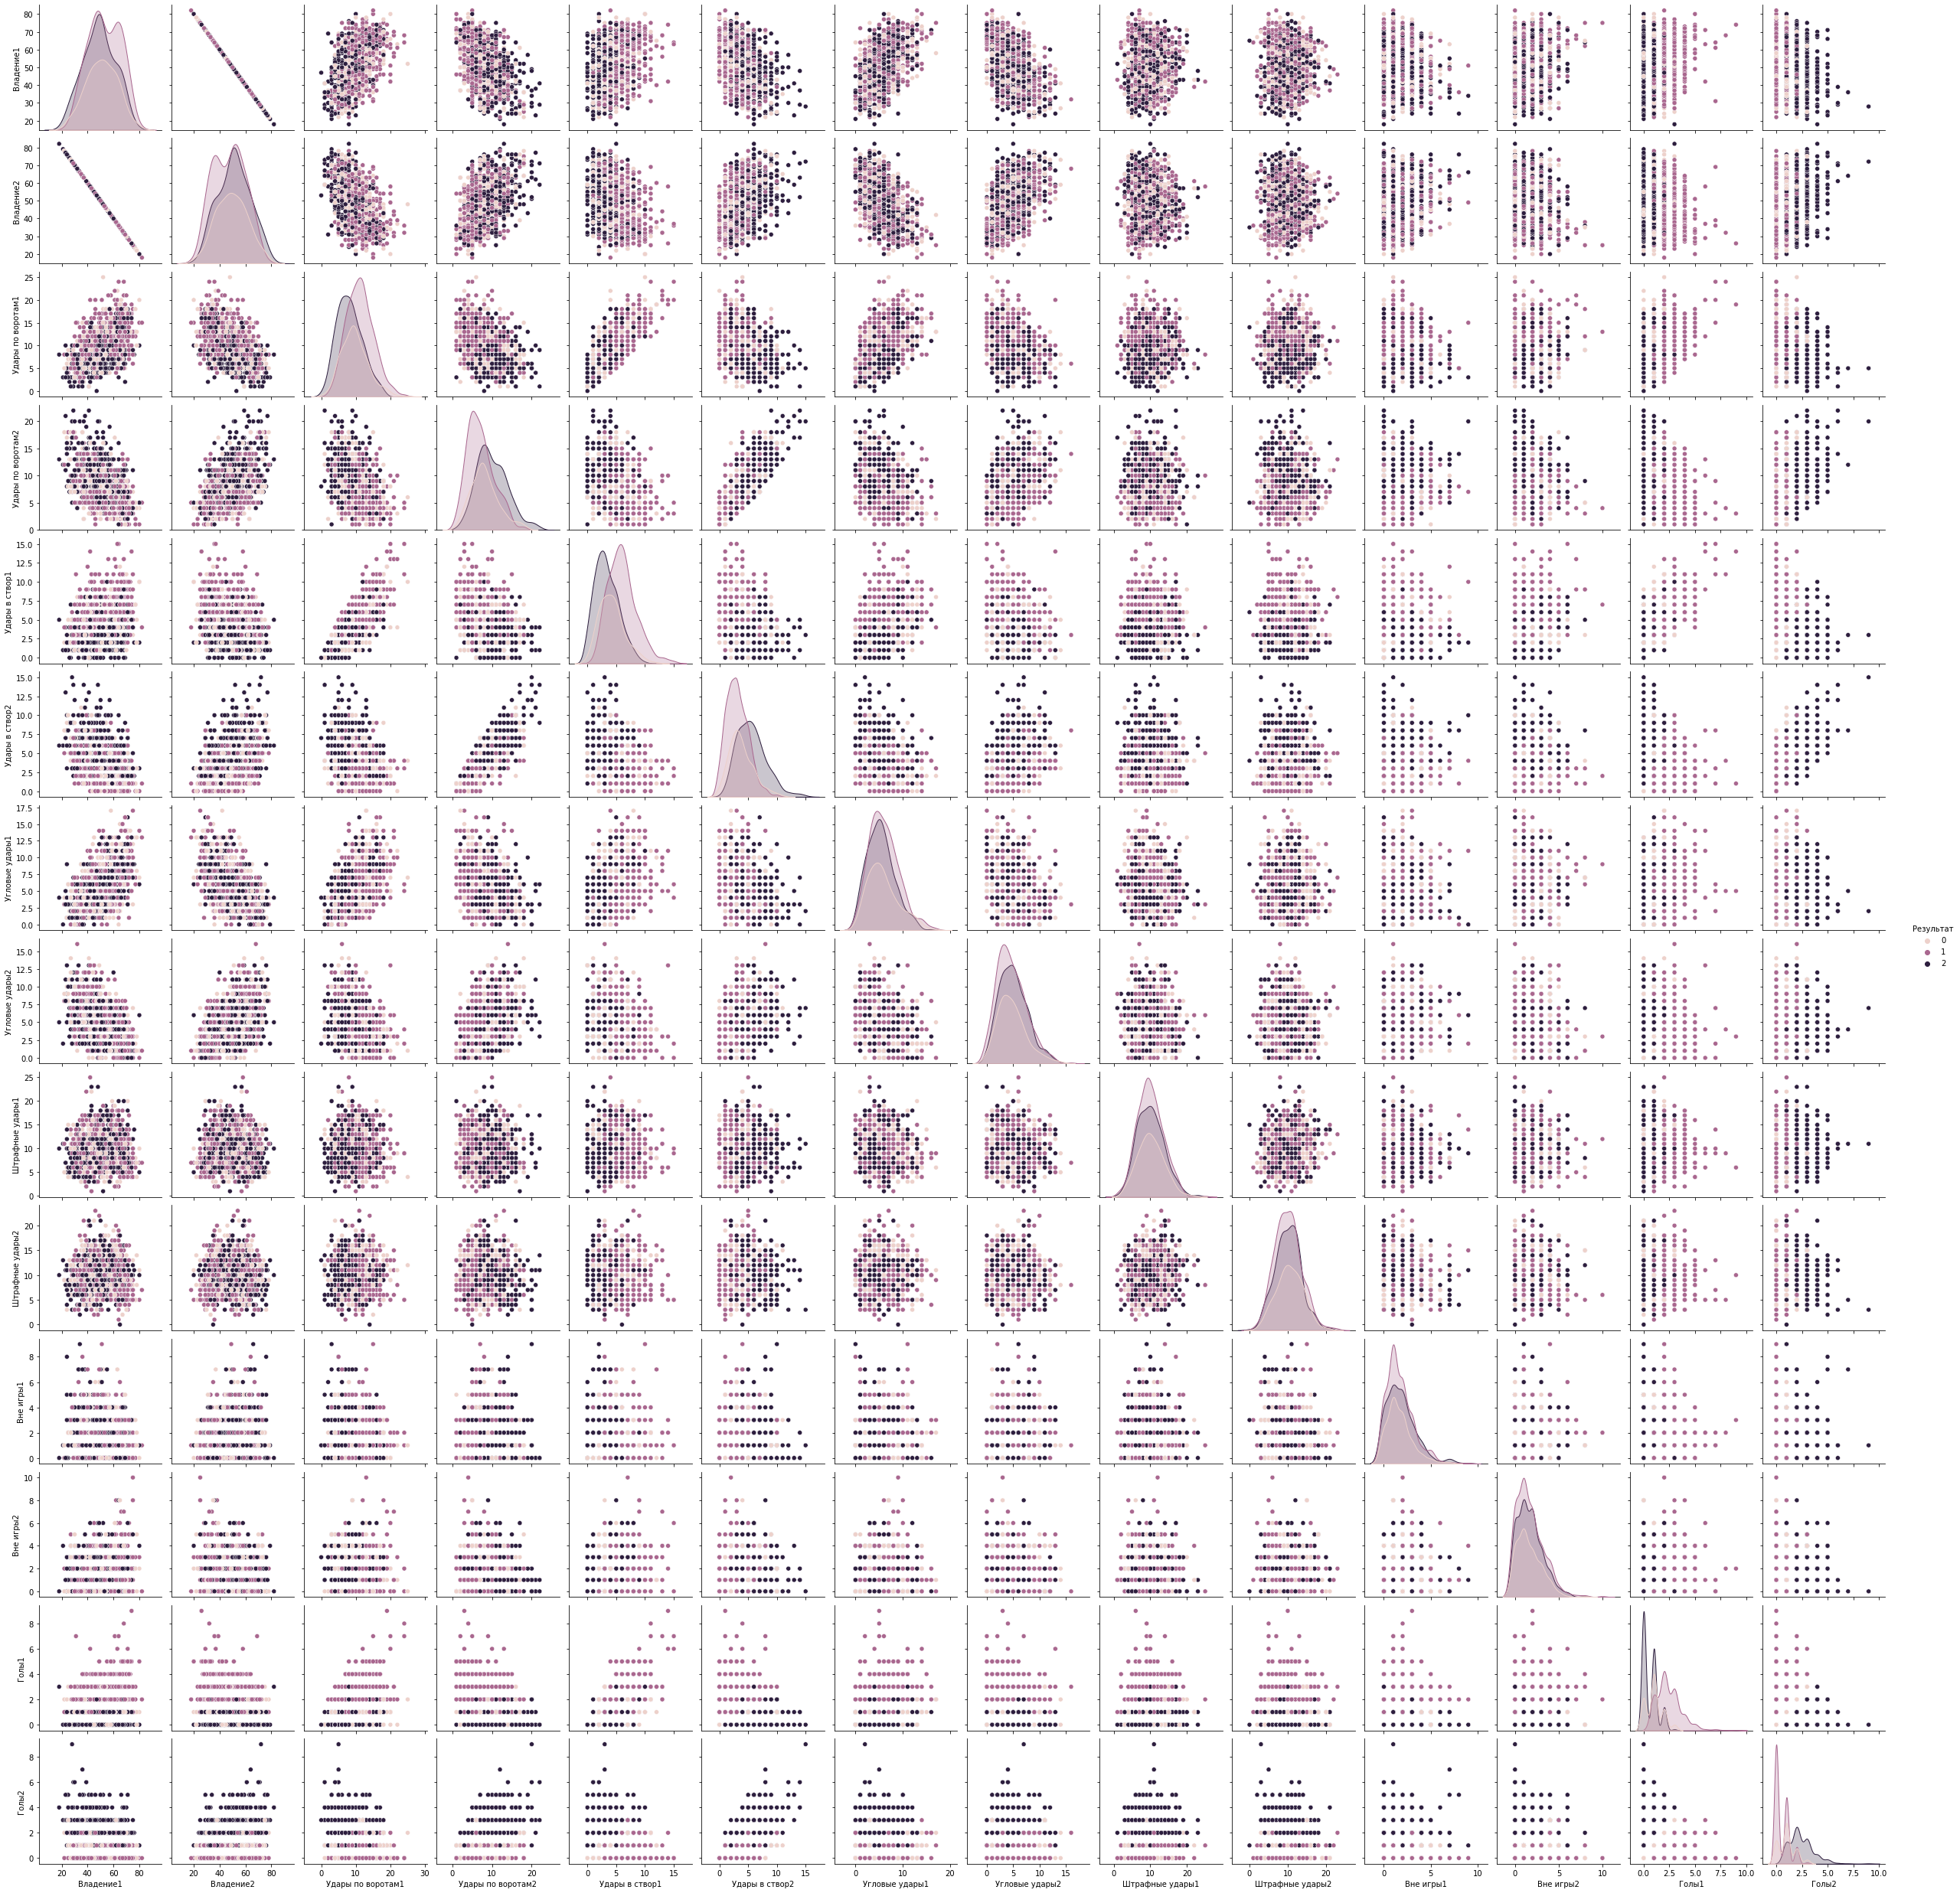

In [346]:
sns.pairplot(data[['Владение1', 'Владение2', 'Удары по воротам1', 'Удары по воротам2',
       'Удары в створ1', 'Удары в створ2', 'Угловые удары1', 'Угловые удары2',
       'Штрафные удары1', 'Штрафные удары2', 'Вне игры1', 'Вне игры2',
                  'Голы1', 'Голы2', 'Результат']], hue = 'Результат');

### Предварительная подготовка данных

Полученные данные сохраним в csv таблицу и будем использовать ее при осуществлении последующих шагов:

In [352]:
data.to_csv(r'/Users/timurermakov/Desktop/football.csv')